# Exploratory Data Analysis: Chicago Crime Detection
This analysis is done to detect crime in Chicago

In [208]:
import pandas as pd
import numpy as np
import string 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import dateutil


##### This is to import all the relevant libraries

In [209]:
cdd=pd.read_csv(r'C:/Users/MAHE/Desktop/Chicago_Crime_Detective.csv')

In [210]:
cdd

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001


In [211]:
cdd.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


In [212]:
cdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
Unnamed: 0             191641 non-null int64
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
dtypes: bool(2), int64(4), object(4)
memory usage: 12.1+ MB


In [213]:
cdd['Date'] = cdd['Date'].apply(dateutil.parser.parse, dayfirst=True)


In [214]:
cdd.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [215]:
cdd.Arrest = cdd.Arrest.astype(bool)

In [216]:
cdd.Domestic = cdd.Domestic.astype(bool)

In [217]:
cdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
Unnamed: 0             191641 non-null int64
ID                     191641 non-null int64
Date                   191641 non-null datetime64[ns]
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
dtypes: bool(2), datetime64[ns](1), int64(4), object(3)
memory usage: 12.1+ MB


In [218]:
cdd['Date'].count()

191641

In [219]:
cdd.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [220]:
print("Median Month & Year: \n", cdd.Date.quantile(.5).month_name(),  cdd.Date.quantile(.5).year,  "\n",  cdd.Date.quantile(.5))

Median Month & Year: 
 May 2006 
 2006-05-24 22:00:00


## Let's see how many crimes are being committed on a monthly/daily basis

In [221]:
cdd.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


cdd.groupby('Date.month_name()')LocationDescription["RESIDENTIAL YARD (FRONT/BACK)"].count()

Ya Stupid. 

In [222]:
cdd['month']=cdd['Date'].dt.month_name()

In [223]:
cdd.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December


First we will add a new column to the dataframe, called weekday so that we can check if there's a relation between number of crimes committed and day of the week. 

In [224]:
cdd['weekday'] = cdd['Date'].dt.dayofweek

In [225]:
cdd.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December,0


Let's see which is the most crime-heavy month and subsequently, which is the least.

In [226]:
print(cdd['month'].value_counts())

October      16977
July         16733
December     16417
January      16325
May          16298
August       16288
September    16009
March        15895
June         15894
November     15765
April        15086
February     13954
Name: month, dtype: int64


Both these lines of code return the same thing, just the order is different.  

In [227]:
cdd.groupby('month')['ID'].count()

month
April        15086
August       16288
December     16417
February     13954
January      16325
July         16733
June         15894
March        15895
May          16298
November     15765
October      16977
September    16009
Name: ID, dtype: int64

###### In any case, October has the most amount of thefts and February the least! Let's plot a graph but first we will convert it into a dictionary

In [228]:
thefts=cdd['month'].value_counts()
theftsdict=thefts.to_dict()
theftsdict

{'October': 16977,
 'July': 16733,
 'December': 16417,
 'January': 16325,
 'May': 16298,
 'August': 16288,
 'September': 16009,
 'March': 15895,
 'June': 15894,
 'November': 15765,
 'April': 15086,
 'February': 13954}

<Figure size 6400x4800 with 0 Axes>

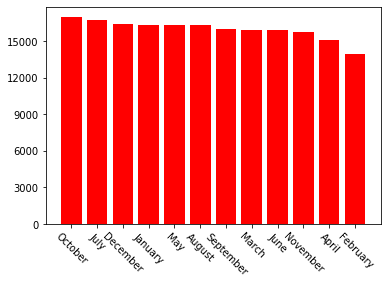

<Figure size 6400x4800 with 0 Axes>

In [229]:
plt.bar(range(len(theftsdict)), list(theftsdict.values()), align='center',color='r')
plt.xticks(range(len(theftsdict)), list(theftsdict.keys()),rotation=-45)
plt.yticks(np.arange(0, 18000,3000))
from matplotlib.pyplot import figure
figure(num=None, figsize=(80, 60), dpi=80, facecolor='g', edgecolor='r')

So what day of the week do most thefts occur? We will deploy our maximum police personnel on that day! 

In [230]:
cdd.groupby('weekday')['ID'].count()

weekday
0    27372
1    27141
2    27387
3    27067
4    28545
5    27406
6    26723
Name: ID, dtype: int64

###### Clearly it's a Thursday. (0='Sunday', 1='Monday' and so on)

Now we will check how many "Arrests" were made for each month

In [231]:
cdd.groupby(['month']).agg({'Arrest':sum})

,Arrest
month,
April,1268.0
August,1287.0
December,1358.0
February,1228.0
January,1352.0
July,1354.0
June,1248.0
March,1295.0
May,1253.0


##### Once again, it is October. Kinda expected? But what can be the reason? Why October? It is not near Christmas but it is the beginning of fall, people are sad and want to go places. 

 Let's see whether crime increases or decreases as the years go by. So for that, first we will add a new column to our dataframe called "year" which will extract the year from our "Date" column

In [242]:
cdd['year'] = cdd['Date'].dt.year

In [243]:
cdd.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,weekday,year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December,0,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December,0,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December,0,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December,0,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December,0,2012


Now we will make a dictionary with number of entries per year

In [245]:
theftsbyyear=cdd['year'].value_counts()
theftsbyyeardict=theftsbyyear.to_dict()
theftsbyyeardict

{2001: 20669,
 2002: 18753,
 2004: 16862,
 2003: 16657,
 2005: 16484,
 2006: 16098,
 2011: 15637,
 2010: 15497,
 2008: 14445,
 2007: 14280,
 2012: 14092,
 2009: 12167}

Note to self: So we can see that years are not in an order, so we will sort the dictionary and then make a graph out of it by passing the dictionary into matplotlib.

In [246]:
import collections
od = collections.OrderedDict(sorted(theftsbyyeardict.items()))

In [247]:
od

OrderedDict([(2001, 20669),
             (2002, 18753),
             (2003, 16657),
             (2004, 16862),
             (2005, 16484),
             (2006, 16098),
             (2007, 14280),
             (2008, 14445),
             (2009, 12167),
             (2010, 15497),
             (2011, 15637),
             (2012, 14092)])

<Figure size 6400x4800 with 0 Axes>

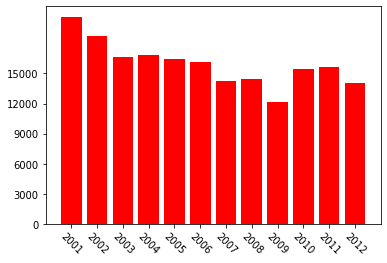

<Figure size 6400x4800 with 0 Axes>

In [248]:
plt.bar(range(len(od)), list(od.values()), align='center',color='r')
plt.xticks(range(len(od)), list(od.keys()),rotation=-45)
plt.yticks(np.arange(0, 18000,3000))
from matplotlib.pyplot import figure
figure(num=None, figsize=(80, 60), dpi=80, facecolor='g', edgecolor='r')

###### So we can see that in general, crime seems to decrease from 2001 to 2012, with an all time low in 2009, probably the after effects of 2008, nobody had cars to be stolen, but obviously I am just speculating

In [256]:
cdd.groupby(['year']).agg({'Arrest':sum})

,Arrest
year,
2001,2152.0
2002,2115.0
2003,1798.0
2004,1693.0
2005,1528.0
2006,1302.0
2007,1212.0
2008,1020.0
2009,840.0


In [258]:
theftsbyyear=cdd['year'].value_counts()

In [259]:
theftsbyyear

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: year, dtype: int64

In [260]:
cdd.tail(200)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,weekday,year
191441,191441,1316704,2001-04-01 19:30:00,STREET,False,False,732,NaN,NaN,2001,April,6,2001
191442,191442,1316930,2001-04-01 19:29:00,STREET,False,False,931,NaN,NaN,2001,April,6,2001
191443,191443,1317093,2001-04-01 19:00:00,STREET,False,False,631,NaN,NaN,2001,April,6,2001
191444,191444,1317270,2001-04-01 19:00:00,STREET,False,False,1412,NaN,NaN,2001,April,6,2001
191445,191445,1326633,2001-04-01 19:00:00,STREET,True,False,211,NaN,NaN,2001,April,6,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,January,0,2001
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,January,0,2001
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,January,0,2001
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,January,0,2001


In [271]:
cdd.groupby(['LocationDescription']).agg({'Arrest':sum}).head(50)

,Arrest
LocationDescription,
ABANDONED BUILDING,0.0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.0
AIRPORT EXTERIOR - NON-SECURE AREA,6.0
AIRPORT EXTERIOR - SECURE AREA,0.0
AIRPORT PARKING LOT,3.0
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,0.0
AIRPORT VENDING ESTABLISHMENT,6.0
AIRPORT/AIRCRAFT,96.0


In [273]:
cdd['LocationDescription'].value_counts().head(7)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
RESIDENTIAL YARD (FRONT/BACK)       1536
Name: LocationDescription, dtype: int64

These are the top 7 Locations where crimes happen. Watch out! 

In [275]:
arrestandyear=cdd.groupby(['Year','Arrest'])['Arrest'].apply(lambda x:x.count())

In [276]:
arrestandyeardict=arrestandyear.to_dict()

In [277]:
arrestandyeardict

{(2001, False): 18517,
 (2001, True): 2152,
 (2002, False): 16638,
 (2002, True): 2115,
 (2003, False): 14859,
 (2003, True): 1798,
 (2004, False): 15169,
 (2004, True): 1693,
 (2005, False): 14956,
 (2005, True): 1528,
 (2006, False): 14796,
 (2006, True): 1302,
 (2007, False): 13068,
 (2007, True): 1212,
 (2008, False): 13425,
 (2008, True): 1020,
 (2009, False): 11327,
 (2009, True): 840,
 (2010, False): 14796,
 (2010, True): 701,
 (2011, False): 15012,
 (2011, True): 625,
 (2012, False): 13542,
 (2012, True): 550}

<Figure size 6400x4800 with 0 Axes>

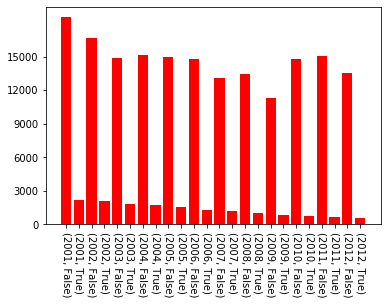

<Figure size 6400x4800 with 0 Axes>

In [279]:
plt.bar(range(len(arrestandyeardict)), list(arrestandyeardict.values()), align='center',color='r')
plt.xticks(range(len(arrestandyeardict)), list(arrestandyeardict.keys()),rotation=-90)
plt.yticks(np.arange(0, 18000,3000))
from matplotlib.pyplot import figure
figure(num=None, figsize=(80, 60), dpi=80, facecolor='g', edgecolor='r')

In [286]:
pd.set_option('display.max_rows',500)
cdd.groupby(['weekday','LocationDescription']).count()['Arrest']

weekday  LocationDescription                            
0        AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA        2
         AIRPORT EXTERIOR - NON-SECURE AREA                     2
         AIRPORT PARKING LOT                                    1
         AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA         1
         AIRPORT VENDING ESTABLISHMENT                          1
         AIRPORT/AIRCRAFT                                      50
         ALLEY                                                313
         APARTMENT                                             27
         ATHLETIC CLUB                                          1
         BANK                                                   2
         BAR OR TAVERN                                          1
         BOWLING ALLEY                                          1
         CAR WASH                                               2
         CHA APARTMENT                                          1
         CHA PARKIN

That will be the end of the analysis for now